## Pytorch로 Logistic Regression 구현

In [1]:
import torch
#pip install torch torchvision

In [2]:
# 학습 데이터 생성
x_train = torch.FloatTensor([[1], [2], [3], [4], [5], [2.5], [3.5], [0],[3.1], [2.7], [2.8], [2.9]])
y_train = torch.FloatTensor([[1], [1], [1], [0], [0], [0], [0], [1], [0], [1], [1], [1]])

In [3]:
# W, b 초기화
#Learning Rate 설정

W = torch.zeros(1,1)
b = torch.zeros(1,1)
lr = 1.0

In [4]:
# 반복 횟수 설정
# W와 b의 required_grad를 True로 설정

for epoch in range(3001):
    W.requires_grad_(True)
    b.requires_grad_(True)
    
    #Hypothesis, cost 설정
    hypothesis = torch.sigmoid(torch.mm(x_train, W) + b)
    cost = torch.mean(
    -y_train * torch.log(hypothesis)
    -(1 -  y_train) * torch.log(1-hypothesis))
    
    # 경사 계산
    # W, b 업데이트
    cost.backward()
    with torch.no_grad() as grd:
        W = W - lr * W.grad
        b = b - lr * b.grad
        
    if epoch % 300 == 0:
        print('epoch: {}, cost: {:.6f}, W: {:.6f}, b: {:.6f}'
              .format(epoch, cost.item(), W.squeeze().item(), b.item()))
        #환경에서는 tensor객체를 string으로 바로 가져오지 못하여 item()을 사용함.

epoch: 0, cost: 0.693147, W: -0.154167, b: 0.083333
epoch: 300, cost: 0.390820, W: -2.174323, b: 6.609555
epoch: 600, cost: 0.383699, W: -2.620779, b: 7.953164
epoch: 900, cost: 0.382149, W: -2.832521, b: 8.587361
epoch: 1200, cost: 0.381706, W: -2.946401, b: 8.927779
epoch: 1500, cost: 0.381565, W: -3.010968, b: 9.120598
epoch: 1800, cost: 0.381517, W: -3.048561, b: 9.232801
epoch: 2100, cost: 0.381500, W: -3.070766, b: 9.299055
epoch: 2400, cost: 0.381494, W: -3.083992, b: 9.338511
epoch: 2700, cost: 0.381492, W: -3.091908, b: 9.362126
epoch: 3000, cost: 0.381491, W: -3.096662, b: 9.376307


In [5]:
# x = [4.5] 혹은 [1.1]일 때, y는 0일까 1일까?

x_test = torch.FloatTensor([[4.5],[1.1]])
test_result = torch.sigmoid(torch.mm(x_test, W) + b)

print(torch.round(test_result))

tensor([[0.],
        [1.]])


## 여러가지 Optimizer 사용해보기

In [6]:
optimizer = torch.optim.SGD([W,b], lr=1.0)

In [7]:
# 미리 구현된 모듈 사용

#optimizer.zero_grad()
#cost.backward()
#optimizer.step()

In [8]:
#pytorch에는 여러가지 optimizer가 있음 
optimizer = torch.optim.SGD([W,b], lr=1.0)
optimizer = torch.optim.Adam([W,b], lr=1.0)
optimizer = torch.optim.Adadelta([W,b])
optimizer = torch.optim.Adagrad([W,b])
optimizer = torch.optim.RMSprop([W,b])

## Matplotlib으로 결과 시각화

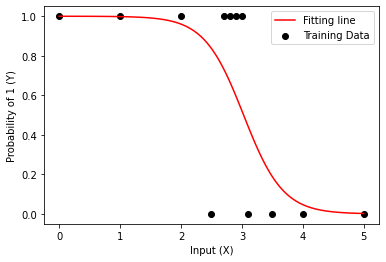

In [9]:
import matplotlib.pyplot as plt
W.requires_grad_(False)
b.requires_grad_(False)

plt.scatter(x_train, y_train, c = "black", label = "Training Data")

X = torch.linspace(0, 5, 100).unsqueeze(1)
Y = torch.sigmoid(torch.mm(X, W) + b)

#label 달기
plt.ylabel("Probability of 1 (Y)")
plt.xlabel("Input (X)")

plt.plot(X, Y, c = "#ff0000", label = "Fitting line")
plt.legend()
plt.show()